In [1]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
from PIL import Image

In [28]:
#np.random.seed(123)

N = 128*128  # number of nodes 128x128 pixels
k = 100  # avg. number of connections per node
P = 9  # random patterns to learn

# C := Network structure (connectivity topology)
C = np.zeros((N,k), dtype='int')
for i in range(N):
    for ki in range(k//2):
        C[i, ki] = i + (ki+1)
        C[i, ki+k//2] = i - (ki + 1)
C[np.where(C < 0)] = C[np.where(C < 0)] + N
C[np.where(C >= N)] = C[np.where(C >= N)] - N

# Rewiring
omega = 0.2
all_nodes = set(range(N))
#print(all_nodes)
for i,ci in enumerate(C):
    for j,cj in enumerate(ci):
        #print(i, ci, cj, j)
        if np.random.random() < omega:
            available_nodes = list(all_nodes - (set([i] + ci) - set([cj])))[1:]
            C[i, j] = np.random.choice(available_nodes)
            
C, np.shape(C)

(array([[    1,  7013,     3, ..., 16336, 16335, 16334],
        [    2, 13126,     4, ..., 16337, 16336, 16335],
        [    3,     4,     5, ..., 16338, 16337, 16336],
        ...,
        [16382,  5407,     0, ..., 16333, 16332, 16331],
        [ 8540,  8745,     1, ..., 16334, 10043, 16332],
        [    0,   604,     2, ...,  3106, 13946, 16333]]),
 (16384, 100))

In [3]:
from scipy.stats import bernoulli
# Random network
N = 128*128  # number of nodes 128x128 pixels
k = 100  # avg. number of connections per node
P = 9  # random patterns to learn
p = k/N
C = []
for i in range(N):
    C += np.where(np.insert(bernoulli.rvs(p, size=(N-1)), i, 0))
C = np.array(C)
#C

In [29]:
# Weights initialization
W = np.array([np.zeros(len(ci)) for ci in C])
W, np.shape(W)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 (16384, 100))

In [8]:
# Random patterns
X = binom.rvs(n=1, p=0.5, size=(P, N))*2 - 1
X, np.shape(X)

(array([[-1,  1,  1, ..., -1,  1, -1],
        [-1, -1,  1, ...,  1,  1, -1],
        [ 1, -1, -1, ...,  1,  1,  1],
        ...,
        [-1, -1, -1, ..., -1,  1, -1],
        [ 1,  1, -1, ...,  1,  1,  1],
        [-1,  1,  1, ..., -1,  1,  1]]),
 (9, 16384))

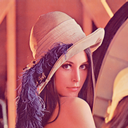

In [5]:
img = Image.open('./ann/lenna.png')
img = img.resize((128,128), Image.ANTIALIAS)
img

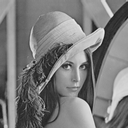

In [6]:
imggs = img.convert('L')
imggs

activity: 0.49310302734375


(10, 16384)

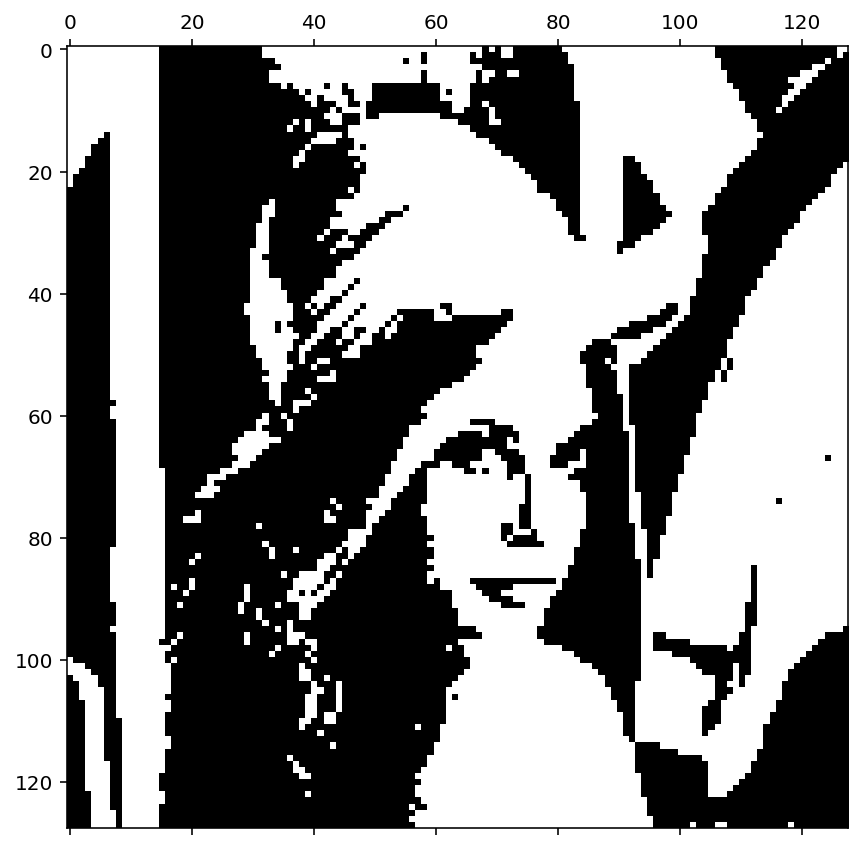

In [9]:
th_value = 128
imgbw = np.asarray(imggs)
imgbw = (imgbw > th_value)*1
imgbw = 1 - imgbw
plt.matshow(imgbw, cmap='Greys')
print('activity:', 1 - np.mean(imgbw))
lenna = imgbw.reshape(1, 128*128)*2-1
X = np.concatenate((X, lenna))
np.shape(X)

In [30]:
#for each pattern x in X
for x in X:
    # for each node i
    for i in range(N):
        W[i] = W[i] + x[C[i]]*x[i]
W

array([[ 2.,  0.,  0., ..., -4.,  0.,  6.],
       [ 2.,  0.,  0., ..., -2.,  0., -4.],
       [ 0.,  0.,  4., ...,  4.,  2.,  4.],
       ...,
       [ 4., -2.,  6., ..., -4., -2.,  0.],
       [ 0., -2.,  0., ..., -4., -2.,  0.],
       [ 2., -2., -2., ..., -2., -2., -4.]])

In [16]:
x = X[0]  # pattern 0
# Wij^0 = xi^0 * xj^0
x[C[0]]*x[0]  # C[0] vecindarion del nodo 0, x[0] estado del nodo 0 

array([ 1,  1,  1, -1])

In [18]:
x[C[0]], x[0]

(array([ 1,  1,  1, -1]), 1)

(0.0, 1.0)

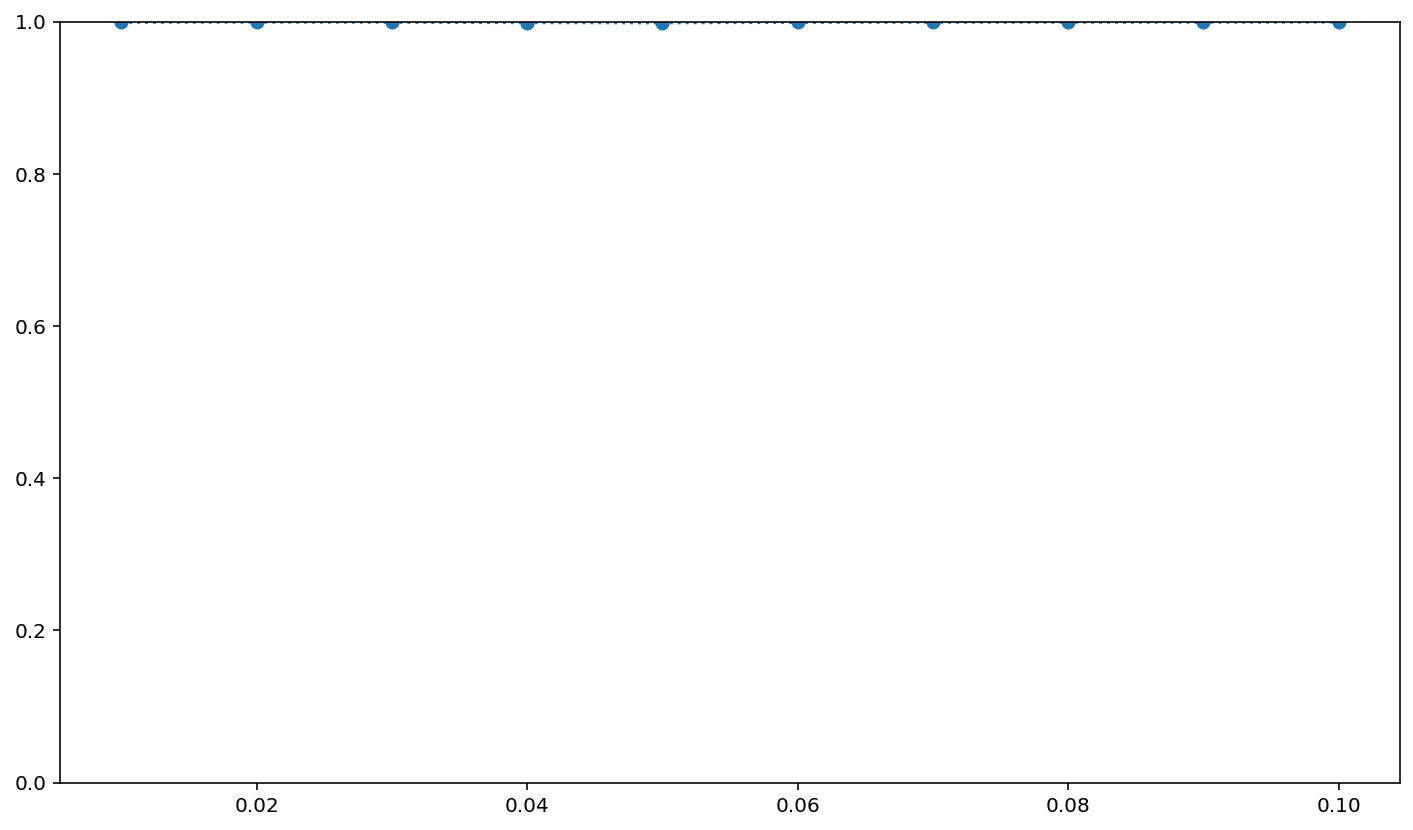

In [17]:
# Measure the quality of retrieval 
M = []  # M is 1, perfect retrieval, M is 0 no retrieval

#for each pattern x in X
for x in X:
    xt = np.copy(x)  # pattern x in time 0
    
    m = [np.sum(x*xt)/N]  # initianl overlap in time 0, x is equal to xt, so m=1
    
    # update network for 100 steps
    for ti in range(100):
        xt = np.array([(np.sum(xt[C[nxi]]*W[nxi]) >= 0)*2-1 for nxi in range(N)])
        m += [np.sum(x*xt)/N]  # calculate overlap
        if m[-1] == m[-2]:
            break
    M += [m[-1]]
    
plt.plot(np.array(range(1,len(X)+1))/k, M, ':o')
plt.ylim((0,1))

In [55]:
M

[1.0, 0.8]

In [35]:
x = X[0]
xt = np.copy(x)
[(np.sum(xt[C[nxi]]*W[nxi]) >= 0)*2-1 for nxi in range(N)]

[1, 1, 1, 1, 1, -1, 1, -1, -1, 1]

In [25]:
# kneihborhood, weighted connection with kneihgborhood
xt[C[1]], W[1]

(array([1, 1, 1, 1]), array([2., 2., 0., 2.]))

In [29]:
[np.sum(xt[C[nxi]]*W[nxi]) for nxi in range(N)]

[0.0, 6.0, 4.0, 4.0, 2.0, -2.0, 4.0, -6.0, -6.0, 6.0]

In [49]:
x1 = np.array([ 1,  1,  1,  1,  1, -1,  1, -1, -1,  1])*-1
x, x1

(array([ 1,  1,  1,  1,  1, -1,  1, -1, -1,  1]),
 array([-1, -1, -1, -1, -1,  1, -1,  1,  1, -1]))

In [51]:
np.abs(np.sum(x*x1)/N)

1.0

array([[-1, -1,  1, ...,  1,  1, -1],
       [-1, -1, -1, ...,  1, -1,  1],
       [ 1,  1,  1, ...,  1, -1,  1],
       ...,
       [ 1,  1,  1, ...,  1,  1,  1],
       [-1,  1, -1, ..., -1,  1,  1],
       [ 1,  1,  1, ...,  1, -1, -1]])

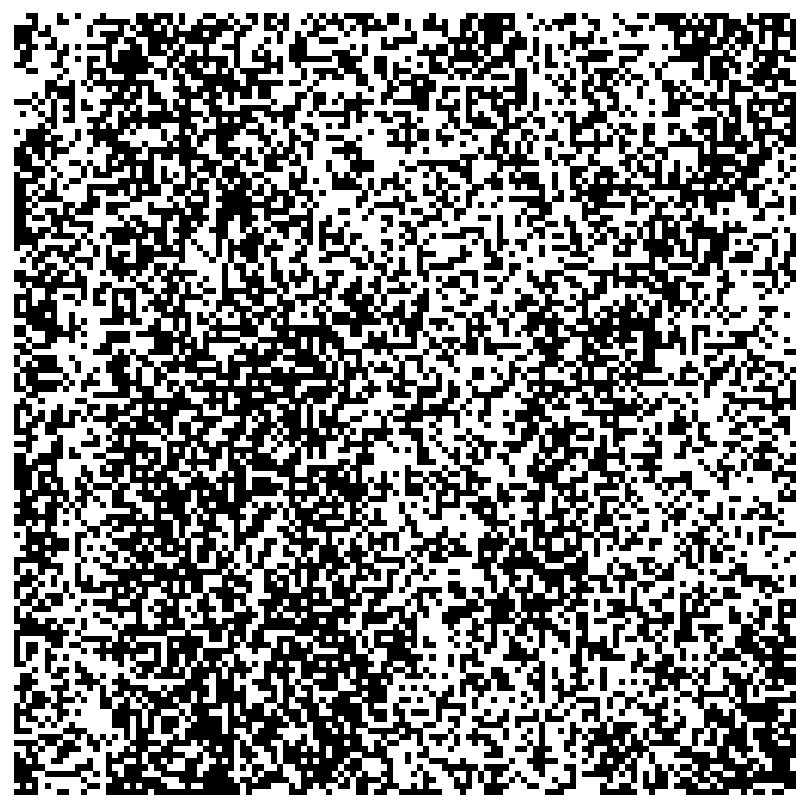

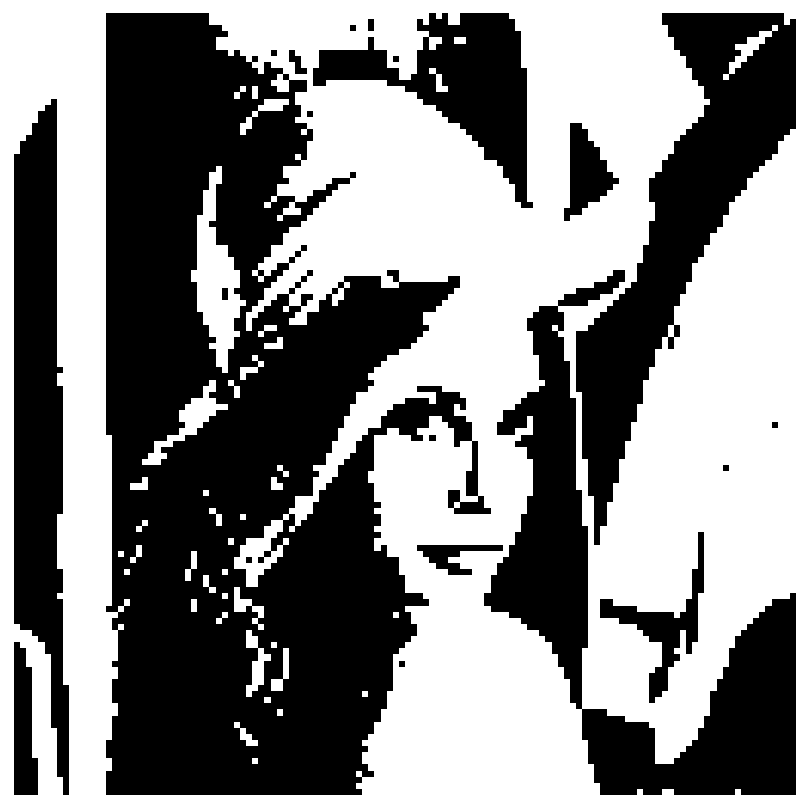

In [20]:
noise_level = 0.75

noisy_lenna = lenna.copy()

for i in range(np.shape(noisy_lenna)[1]):
    if np.random.random() < noise_level:
        noisy_lenna[0, i] = np.random.randint(2)*2 - 1

plt.matshow(noisy_lenna.reshape((128,128)), cmap='Greys')
a = plt.axis('off')

x = X[-1] 
plt.matshow(x.reshape((128,128)), cmap='Greys')
a = plt.axis('off')

noisy_lenna.reshape((128,128))

0.9993896484375

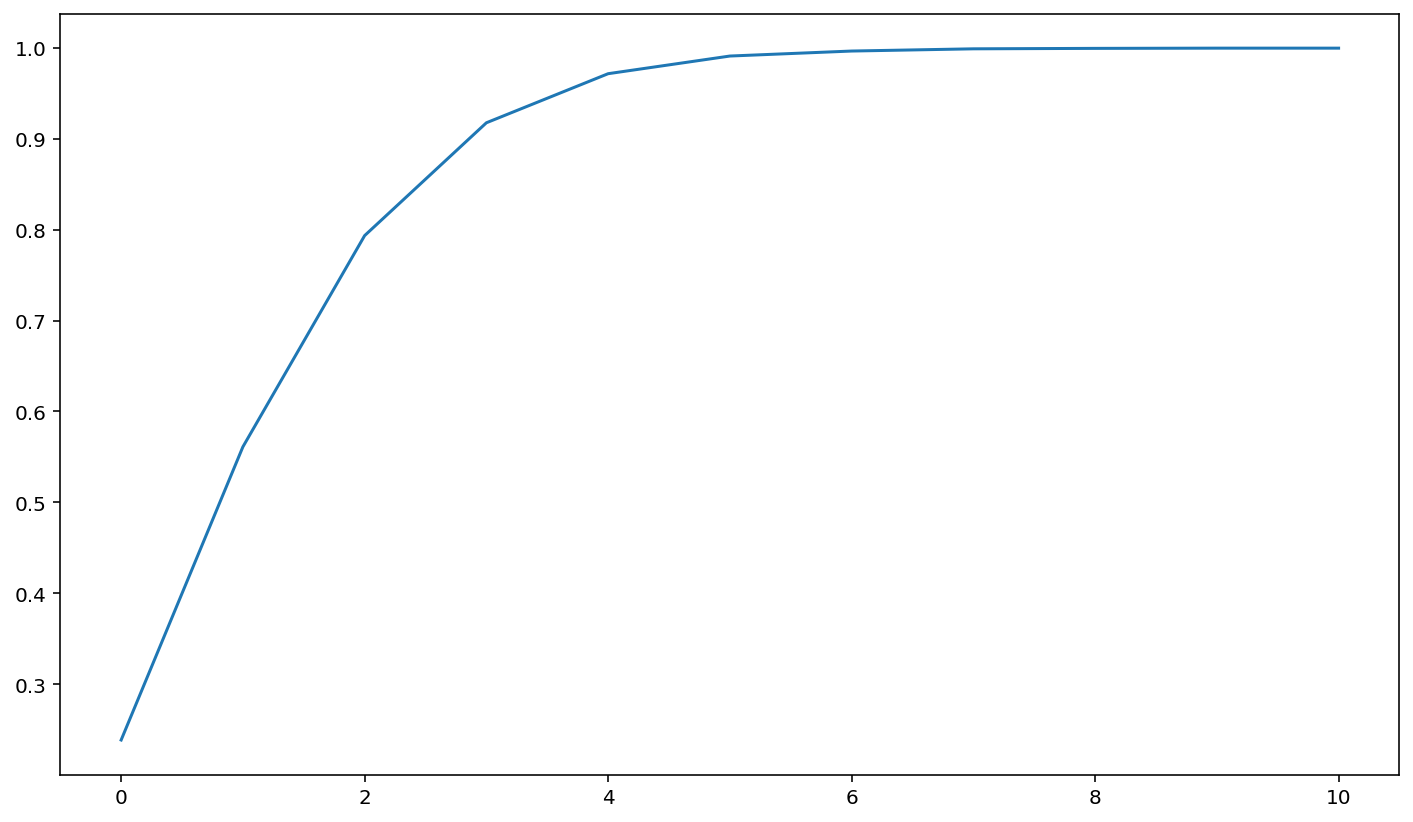

In [31]:
x = X[-1]  # Learned Lenna is in X, last pattern

xt = np.copy(noisy_lenna.flatten())  # init network in noisy lenna  
        
m = [np.sum(x * xt) / N]  # initial overlap

for ti in range(100):
    # network update for t=100
    xt = np.array([int(np.sum(xt[C[nxi]]*W[nxi]) >= 0)*2-1 for nxi in range(N)])
    m += [np.sum(x * xt) / N]  # test overlap x and xt (net state)
    if m[-1] == m[-2]:
        break
        
plt.plot(m)
m[-1]

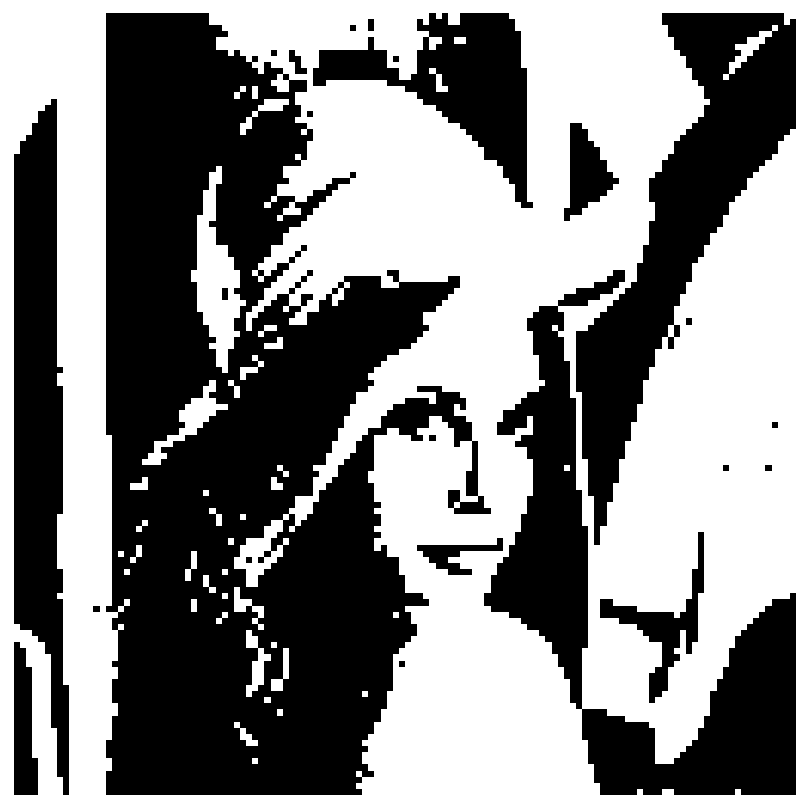

In [32]:
plt.matshow(xt.reshape((128,128)), cmap='Greys')
a = plt.axis('off')

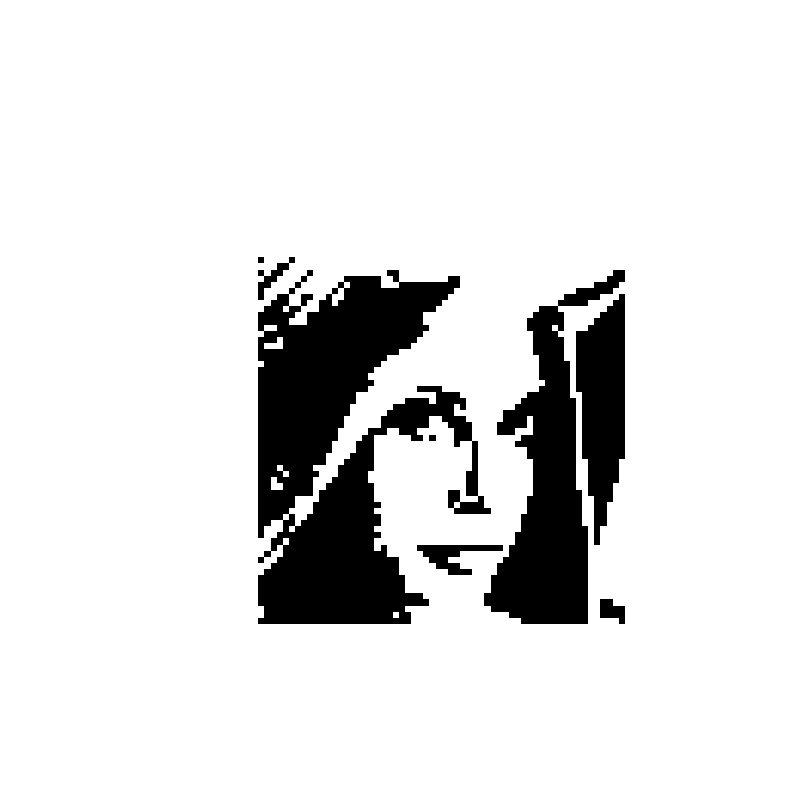

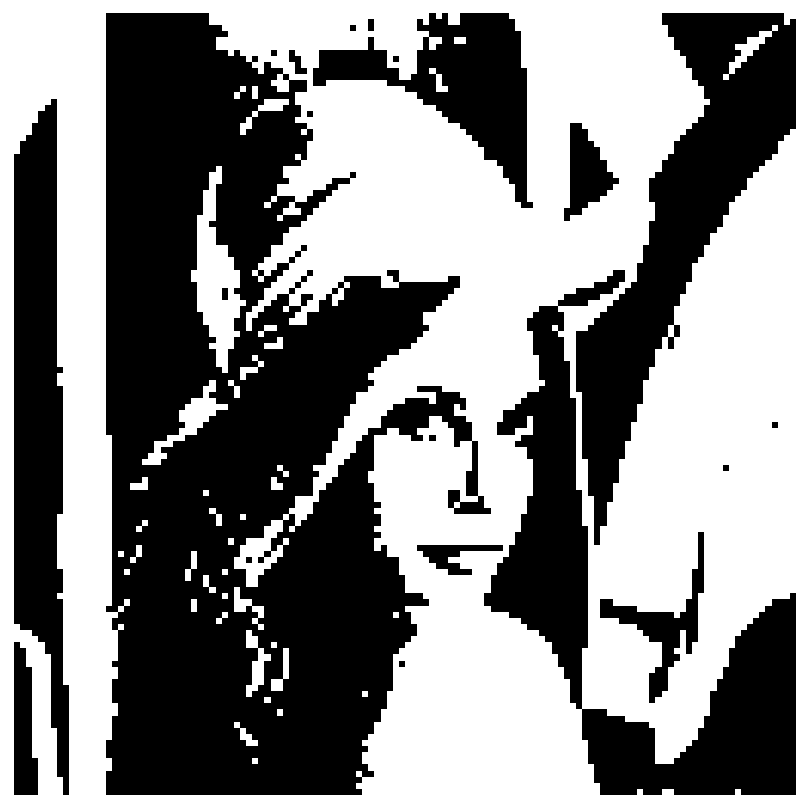

In [20]:
lenna_rostro = np.zeros((128,128), dtype='int')

lenna_rostro[40:100,40:100] = imgbw[40:100,40:100]

plt.matshow(lenna_rostro, cmap='Greys')
a = plt.axis('off')

x = X[-1] 
plt.matshow(x.reshape((128,128)), cmap='Greys')
a = plt.axis('off')

0.4649658203125

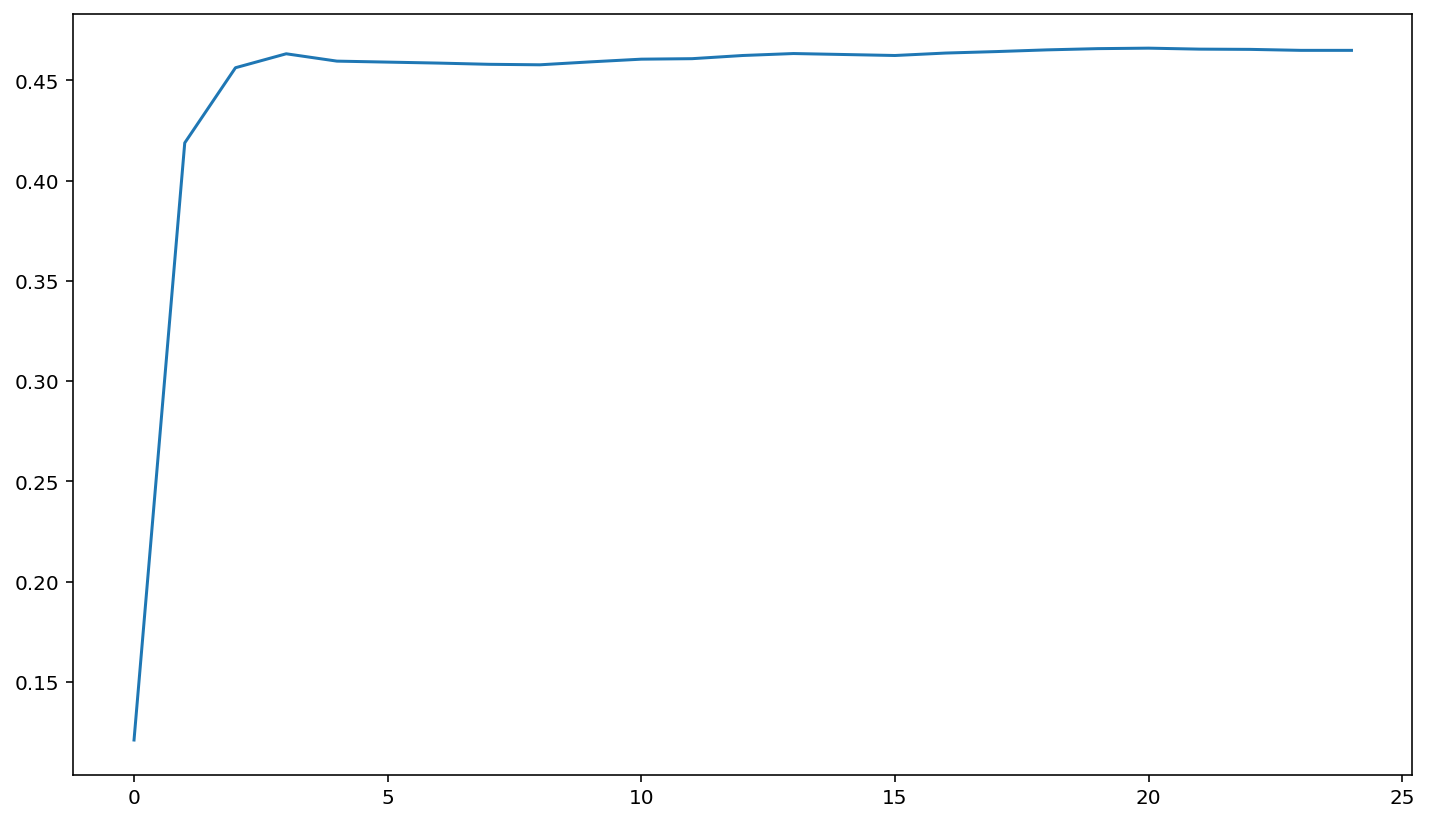

In [26]:
x = X[-1]  # Learned Lenna is in X[-1], last pattern

xt = np.copy(lenna_rostro.flatten())  # init network in noisy lenna

m = [np.sum(x * xt) / N]  # initial overlap

for ti in range(100):
    # network update for t=100
    xt = np.array([int(np.sum(xt[C[nxi]]*W[nxi]) >= 0)*2-1 for nxi in range(N)])
    m += [np.sum(x * xt) / N]  # test overlap x and xt (net state)
    if m[-1] == m[-2]:
        break

plt.plot(m)
m[-1]

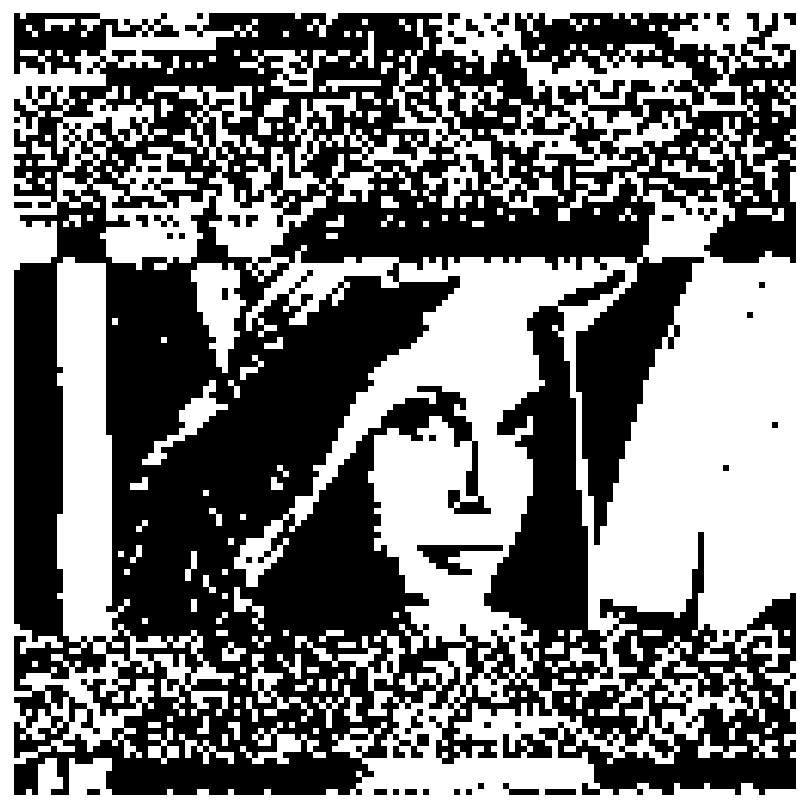

In [27]:
plt.matshow(xt.reshape((128,128)), cmap='Greys')
a = plt.axis('off')